# Plot scan

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
import sys
sys.path.append('../')
from auxPlots import readContours
import seaborn as sns
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

#### Get contours from different sources

In [8]:
# Mono-Jet (CMS-EXO-20-004)
monoJetDict = readContours('./monojet_curve_sms.csv')
print('MonoJet=',monoJetDict.keys())
    
# mtt (CMS-TOP-20-001)
cmsMTTdict = readContours('./CMS_mtt_oneLoop_contours.csv')
print('cmsMTT=',cmsMTTdict.keys())
cmsMTTdictEFT = readContours('./CMS_mtt_eft_contours.csv')
print('cmsMTTEFT=',cmsMTTdictEFT.keys())

# pTt (ATLAS-TOPQ-2019-23)
atlasPTdict = readContours('./ATLAS_pT_oneLoop_contours.csv')
print('atlasPT=',atlasPTdict.keys())
atlasPTdictEFT = readContours('./ATLAS_pT_eft_contours.csv')
print('atlasPTEFT=',atlasPTdictEFT.keys())


# SModelS
smodelsDict = readContours('./SModelS_contours.csv')
print('SModelS=',smodelsDict.keys())

# Direct searches (SModelS  + MonoJet)
directDict = {}
cVals = set(smodelsDict.keys()).intersection(set(monoJetDict.keys()))
for c in cVals:
    smodelsCurve = np.array([list(x) for x in smodelsDict[c]])
    monoJetCurve = np.array([list(x) for x in monoJetDict[c]])
    # interpolate in y vs x to get most constraining curve
    f_smodels = interp1d(smodelsCurve[:,1],smodelsCurve[:,0],
                         fill_value=-1,bounds_error=False)
    f_mono = interp1d(monoJetCurve[:,1],monoJetCurve[:,0],
                      fill_value=-1,bounds_error=False)
    # Get all 
    ypts = np.array(sorted(list(set(smodelsCurve[:,1].tolist()+monoJetCurve[:,1].tolist()))))
    combCurve = np.array([(max(f_smodels(y),f_mono(y)),y) for y in ypts],
                         dtype=smodelsDict[c].dtype)
    directDict[c] = combCurve
    
print('direct=',directDict.keys())


MonoJet= dict_keys([0.8, 1.0])
cmsMTT= dict_keys([5.0, 10.0, 12.0, 15.0, 20.0])
cmsMTTEFT= dict_keys([10.0, 12.0, 15.0, 20.0])
atlasPT= dict_keys([5.0, 10.0])
atlasPTEFT= dict_keys([5.0, 10.0])
SModelS= dict_keys([0.67, 1.0])
direct= dict_keys([1.0])


In [11]:
# Select contour values:
colors = sns.color_palette('deep')
plots = {
        # 'Mono Jet' : {'contour' : 1.0, 'dataDict' : monoJetDict, 
                    #    'fill' : True, 'linestyle' : 'solid', 'color' : colors[0]},
        #  r'Stop Searches ($k=1.5$)' : {'contour' : 0.67, 'dataDict' : directDict, 
                            # 'fill' : True, 'linestyle' : 'solid', 'color' : colors[1]},
         r'Direct Searches' : {'contour' : 1.0, 'dataDict' : directDict, 
                            'fill' : True, 'linestyle' : 'solid', 'color' : colors[1]},                            
        #  r'$m(t\bar{t})$, $y_{DM} = 5$ (1-loop)' : {'contour' : 5.0, 'dataDict' : cmsMTTdict, 
                                                    #  'fill' : False, 'linestyle' : 'solid', 'color' : colors[5]},
         r'$m(t\bar{t})$, $y_{DM} = 10$ (1-loop)' : {'contour' : 10.0, 'dataDict' : cmsMTTdict, 
                                                     'fill' : False, 'linestyle' : 'solid', 'color' : colors[6]},
         r'$m(t\bar{t})$, $y_{DM} = 10$ (EFT)' : {'contour' : 10.0, 'dataDict' : cmsMTTdictEFT, 
                                                  'fill' : False, 'linestyle' : 'dashed', 'color' : colors[6]},
        #  r'$m(t\bar{t})$, $y_{DM} = 12$ (EFT)' : {'contour' : 12.0, 'dataDict' : cmsMTTdictEFT, 
                                                #   'fill' : False, 'linestyle' : 'dashed', 'color' : colors[3]},
         r'$p_T(t_h)$, $y_{DM} = 5$ (1-loop)' : {'contour' : 5.0, 'dataDict' : atlasPTdict, 
                                                     'fill' : False, 'linestyle' : 'solid', 'color' : colors[3]},
        r'$p_T(t_h)$, $y_{DM} = 5$ (EFT)' : {'contour' : 5.0, 'dataDict' : atlasPTdictEFT, 
                                                  'fill' : False, 'linestyle' : 'dashed', 'color' : colors[3]},
         r'$p_T(t_h)$, $y_{DM} = 10$ (1-loop)' : {'contour' : 10.0, 'dataDict' : atlasPTdict, 
                                                     'fill' : False, 'linestyle' : 'solid', 'color' : colors[2]},         
        #  r'$p_T(t_h)$, $y_{DM} = 5$ (EFT)' : {'contour' : 5.0, 'dataDict' : atlasPTdictEFT, 
                                                #   'fill' : False, 'linestyle' : 'dashed', 'color' : colors[5]},
        r'$p_T(t_h)$, $y_{DM} = 10$ (EFT)' : {'contour' : 10.0, 'dataDict' : atlasPTdictEFT, 
                                                  'fill' : False, 'linestyle' : 'dashed', 'color' : colors[2]},

         }

### Plot Exclusions

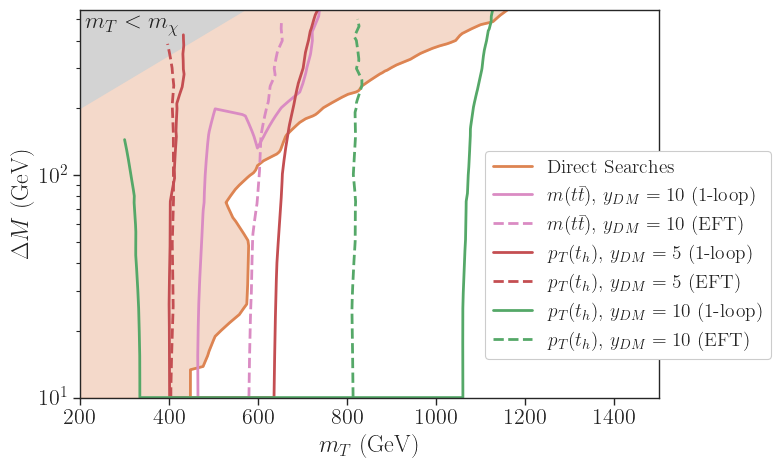

In [12]:
plt.figure(figsize=(8,5))

for p,pInfo in plots.items():
    data = pInfo['dataDict'][pInfo['contour']]
    x = data['mST_GeV']
    y = data['deltaM_GeV']    
    plt.plot(x,y,label=p,linewidth=2,color=pInfo['color'],linestyle=pInfo['linestyle'])
    if pInfo['fill']:
        plt.fill_betweenx(y,x,200,alpha=0.3,color=pInfo['color'])

plt.fill_betweenx([200.,600.],[200.,600.],color='lightgray',alpha=1.0)
plt.text(210.,450.,r'$m_T < m_{\chi}$',fontsize=17)


plt.legend(loc=(0.7,0.1),fontsize=14,framealpha=1.0)
plt.yscale('log')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.ylim(10.,550.)
plt.xlim(200.,1500.)
plt.tight_layout()
plt.savefig('allExclusions.png')
plt.show()

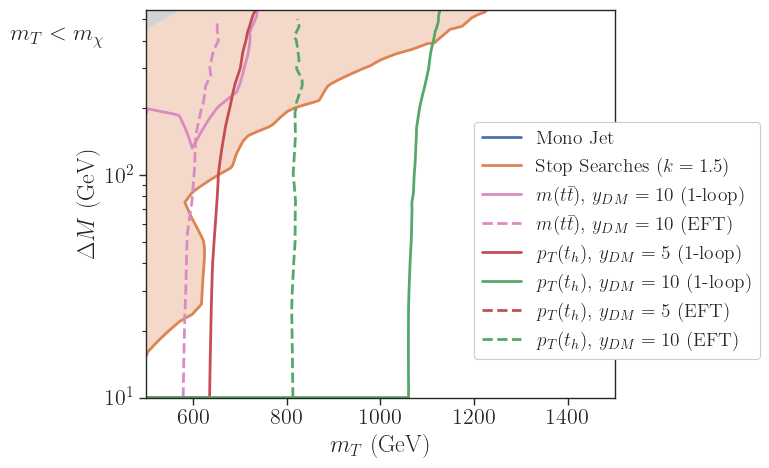

In [ ]:
plt.figure(figsize=(8,5))

for p,pInfo in plots.items():
    data = pInfo['dataDict'][pInfo['contour']]
    x = data['mST_GeV']
    y = data['deltaM_GeV']    
    plt.plot(x,y,label=p,linewidth=2,color=pInfo['color'],linestyle=pInfo['linestyle'])
    if pInfo['fill']:
        plt.fill_betweenx(y,x,200,alpha=0.3,color=pInfo['color'])
        

plt.fill_betweenx([200.,600.],[200.,600.],color='lightgray',alpha=1.0)
plt.text(210.,400.,r'$m_T < m_{\chi}$',fontsize=17)

plt.legend(loc=(0.7,0.1),fontsize=14,framealpha=1.0)
plt.yscale('log')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(500,1500)
plt.ylim(10,550)
plt.tight_layout()
# plt.savefig('allExclusions.png')
plt.show()